In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt


In [3]:
ess2002 = pd.read_stata("ESS_DATA/2002/ESS1e06_5.dta",convert_categoricals = False)

country_names = {"AT": "Áustria",  "BE": "Bélgica",  "CH": "Suíça", "CZ": "Czech Republic", "DE": "Alemanha" , "DK": "Dinamarca", "ES": "Espanha", "FI": "Finlândia", "FR": "França", "GB": "Reino Unido", "GR": "Grécia",  "HU": "Hungria", "IE": "Irlanda", "IL": "Israel", "IT": "Italy", "LU": "Luxemburgo", "NL": "Países Baixos", "NO": "Noruega", "PL": "Polônia", "PT": "Portugal", "SE": "Suécia", "SI": "Eslovênia"}

for key, val in country_names.items():
    ess2002.cntry.loc[ess2002.cntry == key] = val

# o maior pspwght é ~ 6.9. no idea how to use this ....

/usr/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [4]:

display(ess2002.lrscale.head())

0    6.0
1    6.0
2    5.0
3    5.0
4    5.0
Name: lrscale, dtype: float64

In [4]:
ess2002["weighted_ideo"] = ess2002.lrscale*ess2002.pspwght

#ideo = (pd.melt(ess2002,id_vars ="cntry", value_vars = "lrscale").rename(columns = {"cntry": "país"}))
def return_ideos(x,cols,var):
    """
 Better to have the df in a tidy format 
    """
    ideo = x[cols].rename(columns = {"cntry": "país"})
    ideo = ideo.loc[(ideo["país"] != "Italy") & (ideo["país"] != "Czech Republic")]
   

    return ideo

ideo_2002 = return_ideos(ess2002,["cntry", "essround", "lrscale"], "lrscale")


#ideo = ess2002[["cntry", "essround", "lrscale"]].rename(columns = {"cntry": "país"})
#print(ideo["cntry"].unique())
#print(len(ideo["cntry"].unique()))
# the scale is from 0 to 10 ! bigger than that are typos or "don't
#ideo = ideo.loc[(ideo.país != "Italy") & (ideo.país != "Czech Republic")]
#ideo_2002


In [6]:
#non_valid_ideo = ideo.loc[ideo["lrscale"]>10.0]
valid_ideo = ideo_2002.loc[(ideo_2002["lrscale"]<=10.0)]
display(valid_ideo)

,país,essround,lrscale
0,Áustria,1.0,6.0
1,Áustria,1.0,6.0
2,Áustria,1.0,5.0
3,Áustria,1.0,5.0
4,Áustria,1.0,5.0
7,Áustria,1.0,6.0
8,Áustria,1.0,5.0
9,Áustria,1.0,5.0
10,Áustria,1.0,5.0
11,Áustria,1.0,5.0


In [7]:
total_N = ideo.país.value_counts().rename("total_N")
valid_N = valid_ideo.país.value_counts().rename("valid_N")


validity_table = pd.concat([total_N, valid_N], axis = 1)

validity_table.valid_N.div(validity_table.total_N,axis = "index").round(2)

validity_table = validity_table.drop("valid_N",axis = 1)

print(validity_table.to_latex())

#non_valid_N = non_valid_ideo.país.value_counts().rename("non_valid_N") 
#validity_table.total_N.describe()
#non_valid_N = non_valid_ideo.país.value_counts().rename("non_valid_N") 
#validity_table.total_N.describe()

NameError: name 'ideo' is not defined

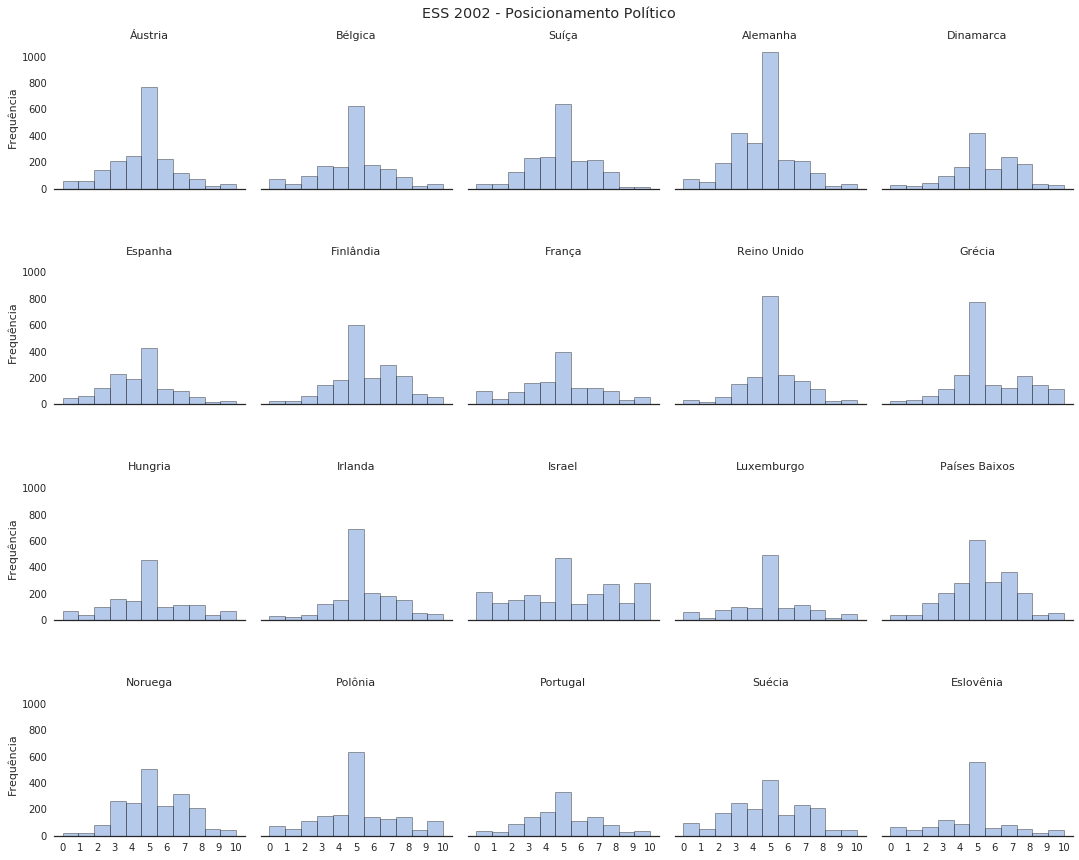

In [9]:
sns.set(style="white", palette="muted", color_codes=True)
g = (sns.FacetGrid(valid_ideo,col = "país", col_wrap = 5)
     .map(sns.distplot,"lrscale", kde = False, bins = 11, hist_kws=dict(edgecolor="k", linewidth=1))
     .set_titles("{col_name}")
     .set_ylabels("Frequência")
     .set(xticks= range(11))
     .set_xlabels("")
     .despine(bottom=False, left=True)
     .fig.subplots_adjust(hspace = 0.5))     

plt.suptitle("ESS 2002 - Posicionamento Político", y = 1.01)
plt.savefig("ess2002plots.pdf", bbox_inches='tight',\
            pad_inches=0.2, dpi = 150)


In [93]:
#display(ideo)
#print(len(ideo.groupby("cntry").count()))
#ideo.groupby("cntry").count()
#print(len(ess2002.index))
# ideo["cntry"].describe()
#ess2002cntry = dict()
#for i in ideo["cntry"].unique():
#   ess2002cntry[i] = ideo.loc[ideo["cntry"] == i]
# display(ideo)
#ideo.país.describe()
#display(valid_ideo.head())
#display(non_valid_ideo)
#ideo["cntry"].unique()
# print(len(list(ess2002.columns.values)))
#display(ess2002.head())

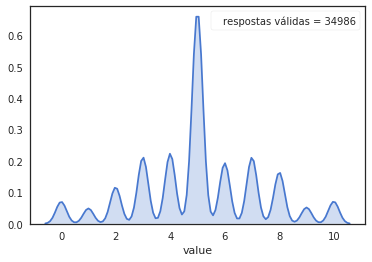

In [ ]:
total_valids = validity_table["valid_N"].sum()
sns.distplot(valid_ideo["value"],hist = False,kde_kws={"shade": True},\
             label = "respostas válidas = {}".format(total_valids))
plt.legend(frameon = True,handlelength = 0)
plt.savefig("total_N_ess2002.pdf",dpi = 400)